# Reducing hospital readmission

![images (89)](images%20(89).jpeg)


## **Background**
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them understand the probability of readmission. They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

**Your** **challenge**

Create a report that covers the following:

- What is the most common primary diagnosis by age group?
- Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.
- On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

_**Introduction**_

Hospital readmission describes a situation where someone who was discharged from the hospital winds up going back in for the same or related care within 30, 60 or 90 days. Hospital readmission, although preventable, poses certain risks to the patients, the hospital and even the society. It is also one of the many indices used for assessing quality of healthcare delivery.

## Executive _**summary**_
 This analysis revealed that for every admitted patient, there is about a 50% risk of readmission regardless of their diagnosis or any other variable however, this risk increases if they have had more than 5 hospital treatments(as inpatient or outpatient) or more than 3 visits to the emergency room in the last 1 year. These are patients that the hospital should focus attention on to reduce readmission rates.
 
 Now, let's explore how we came about this conclusion.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Firstly, let's have a preview of the data
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

💾 The data

Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')


- The data contains 17variables(colums) and 25000 observations(rows)
- There are no null entries but i would have loved to clarify what "missing" entries in specialty and diagnosis represent


In [4]:
#The first aim of this analysis is to determine the commonest primary diagnoses of each age group
grouped_diag = df[['age', 'diag_1']]
grouped = grouped_diag.groupby(['age','diag_1']).size().to_frame('no_of_diag').reset_index()
print(grouped)


         age           diag_1  no_of_diag
0    [40-50)      Circulatory         504
1    [40-50)         Diabetes         369
2    [40-50)        Digestive         271
3    [40-50)           Injury         162
4    [40-50)  Musculoskeletal         100
5    [40-50)            Other         750
6    [40-50)      Respiratory         376
7    [50-60)      Circulatory        1256
8    [50-60)         Diabetes         393
9    [50-60)        Digestive         442
10   [50-60)           Injury         273
11   [50-60)  Musculoskeletal         230
12   [50-60)            Other        1164
13   [50-60)      Respiratory         694
14   [60-70)      Circulatory        1962
15   [60-70)         Diabetes         385
16   [60-70)        Digestive         554
17   [60-70)           Injury         400
18   [60-70)          Missing           1
19   [60-70)  Musculoskeletal         373
20   [60-70)            Other        1402
21   [60-70)      Respiratory         836
22   [70-80)      Circulatory     

[Text(0.5, 1.0, 'common diagnoses by age group')]

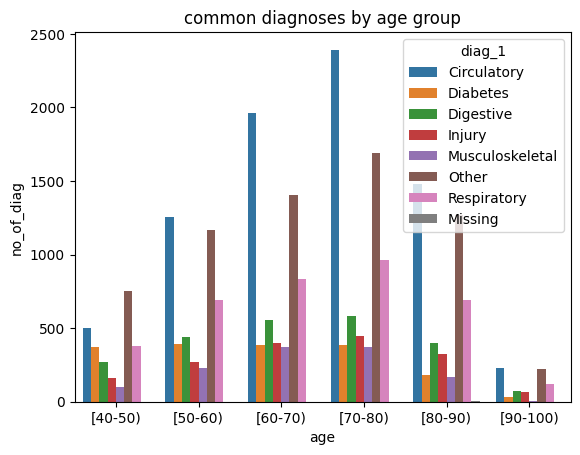

In [5]:
#Now, let's visualize this
sb.barplot(x='age', y='no_of_diag', hue='diag_1', data=grouped).set(title="common diagnoses by age group")

**_Inferences_**
- Circulatory diseases i.e diseases of the heart and blood vessels, are the commonest primary diagnosis across all age groups except for those between the ages of 40-50years whose commonest primary diagnoses are other illnesses not in the major disease system classification i.e "others"
- The  top 3 diagnoses across all age groups however, remains, circulatory, others and respiratory.
- The incidence of circulatory diseases increases with increasing age and this is understandable because aging affects the heart and blood vessels as they gradually get weak.


# _**Next, we will check how diabetes affects readmission**_
![images (91)](images%20(91).jpeg)


In [6]:
#Let's start by creating a new column that tells us if the patients ever had a diagnosis of diabetes from either of the 3 diagnosis they had
def Diagnosis_df(df):
    if (df['diag_1']=="Diabetes") or (df['diag_2']=="Diabetes") or (df['diag_3']=="Diabetes"):
        return "DM_diag"
    else: 
        return "No_DM"
df['Diagnosis'] = df.apply(Diagnosis_df,axis=1)


In [7]:
#Then, check if those with the diagnosis of diabetes had more readmissions using a crosstable
pd.crosstab(df.Diagnosis, df.readmitted)

readmitted,no,yes
Diagnosis,,
DM_diag,4699,4089
No_DM,8547,7665


In [8]:
#Let's check for any statistical relationship between the diagmosis of diabetes and readmissions using chi square and p value
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.Diagnosis, df.readmitted))

(1.258365743727486,
 0.26196065982058314,
 1,
 array([[4656.23392, 4131.76608],
        [8589.76608, 7622.23392]]))

_**Insights:**_
- It is obvious from the cross table that the majority(65.2%) of the patients that were readmitted did not even have the diagnosis of diabetes in any of their 3 diagnosis.
- Of all patients with diabetes diagnosis, only 46.7% of them end up being readmitted.
- Since the p value(0.2619...) is greater than 0.05, then there is no statistically significant relationship between diagnosis of diabetes and readmission. However, we'll now check if control of diabetes or change in diabetes medications play any role in readmission.
- We will also explore other variables to determine which ones play important roles in readmission so that we can use those variables as important indicators of readmission



[Text(0.5, 1.0, 'Diabetes medication vs readmission')]

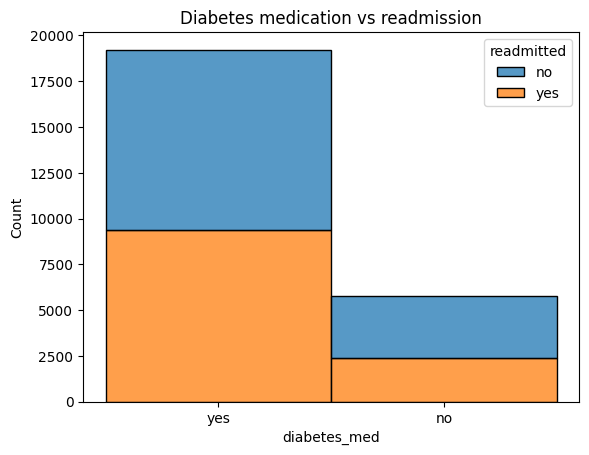

In [9]:
#Since the diagnosis of diabetes doesn't increase the risks of readmission, does being on diabetes medication do?
sb.histplot(x='diabetes_med', hue='readmitted', data=df, stat="count", multiple="stack").set(title="Diabetes medication vs readmission")

[Text(0.5, 1.0, 'Change in diabetes medication vs Readmission')]

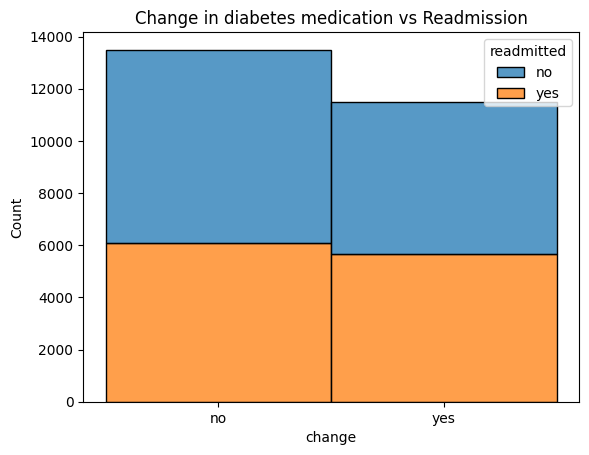

In [10]:
#How about if there's a change in the fiabetes medication of he patient?
sb.histplot(binwidth=0.5, x='change', hue='readmitted', data=df, stat="count", multiple="stack").set(title="Change in diabetes medication vs Readmission")

_**Inferences drawn:**_
- Being placed on diabetes medications doesn't increase risk of readmission. As seen, slightly less than 50% of all those on diabetes medications get readmitted.
- Also, as seen in the graph, change in diabetes medications doesn't play a central role in readmission

[Text(0.5, 1.0, 'Control of diabetes vs Readmission')]

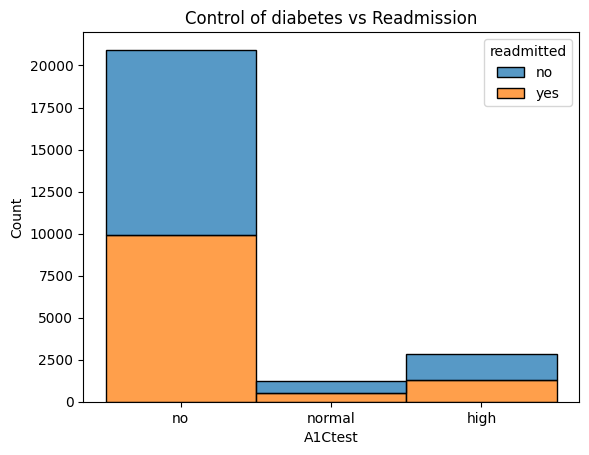

In [11]:
#Let's check if blood glucose control affects readmission using the results of their A1C test
sb.histplot(x='A1Ctest', hue='readmitted', data=df, stat="count", multiple="stack").set(title="Control of diabetes vs Readmission")

_**Inference**_
A1C test is known as glycated hemoglobin. It is used to determine how well a diabetic patient's blood glucose level has been controlled over the last 3 months.
Diabetics with good control have less than 6% while those with poor contols have high values ≥7%
This graph has shown that the readmission rate for those with normal and high A1C tests is comparable hence, no significant. relationship between conteol of diabtes and readmission

# **Lastly, we will be analysing the remaining variables to identify any indicator(s) for readmission**
![images (92)](images%20(92).jpeg)


[Text(0.5, 1.0, 'Age vs readmission')]

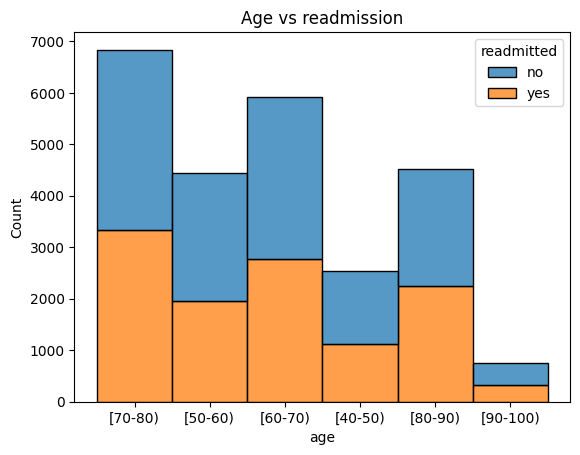

In [12]:
#Does age play any role in readmission?
sb.histplot(x='age', hue='readmitted', data=df, stat="count", multiple="stack").set(title="Age vs readmission")

**Finding:** For every age group, the probability of readmission is comparable at about 50% hence, age doesn't play a central role in readmission

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Circulatory'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Injury'),
  Text(3, 0, 'Digestive'),
  Text(4, 0, 'Respiratory'),
  Text(5, 0, 'Diabetes'),
  Text(6, 0, 'Musculoskeletal'),
  Text(7, 0, 'Missing')])

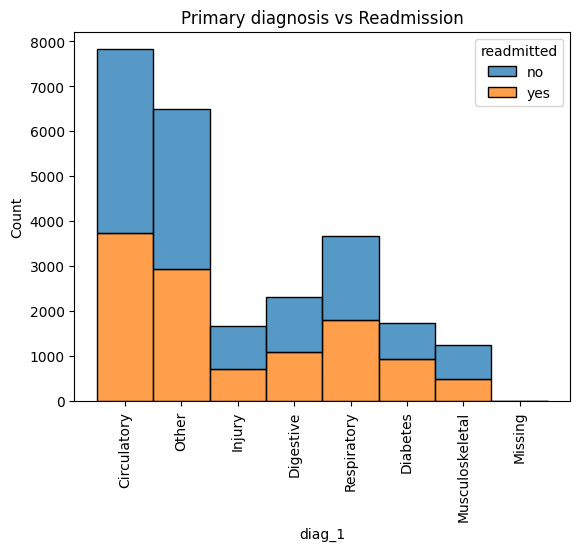

In [13]:
#We found earlier that diabetes doesn't play a central role in readmission so, let's check across all primary diagnosis to know if there is any particular diagnosis that does.
sb.histplot(x='diag_1', hue='readmitted', data=df, stat="count", multiple="stack").set(title="Primary diagnosis vs Readmission")
plt.xticks(rotation=90)

**Finding:** The probablity of readmission is approximately 50% for all categories of primary diagnosis hence, the primary diagnosis doesn't play a central role in readmission

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Missing'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'InternalMedicine'),
  Text(3, 0, 'Family/GeneralPractice'),
  Text(4, 0, 'Cardiology'),
  Text(5, 0, 'Surgery'),
  Text(6, 0, 'Emergency/Trauma')])

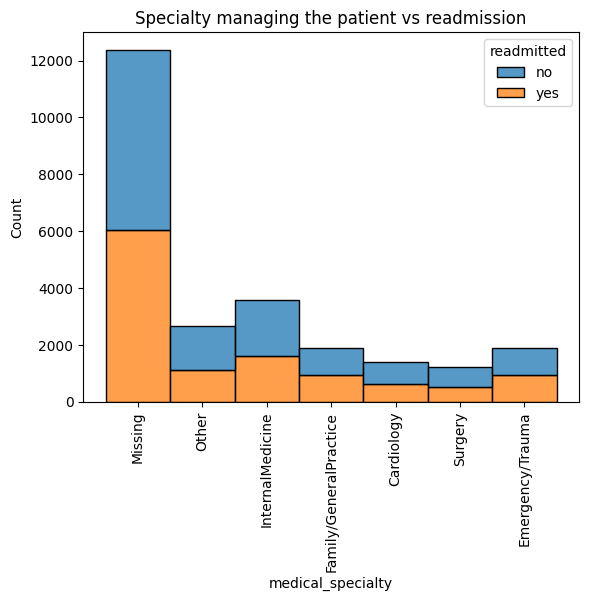

In [14]:
#How about the role of managing specialty in readmission?
sb.histplot(x='medical_specialty', hue='readmitted', data=df, stat="count", multiple="stack").set(title="Specialty managing the patient vs readmission")
plt.xticks(rotation=90)

**Finding:** Regardless of the managing specialty, all patiients have about 50% risk of readmission. 

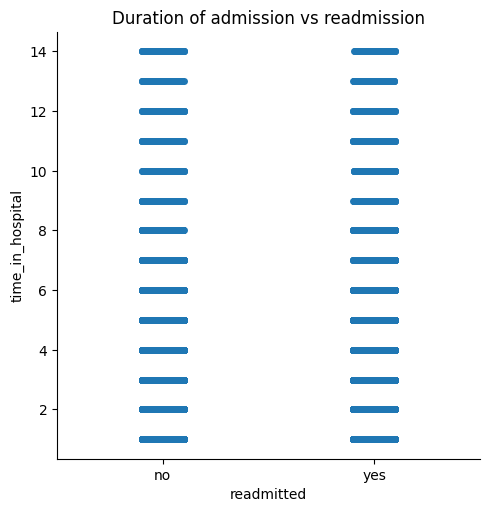

In [15]:
#How about duration of last hospital admission? Do people who stay for short duration tend to come back for readmission?
sb.catplot(y='time_in_hospital', x='readmitted', data=df).set(title="Duration of admission vs readmission")

**Finding:** There is no correlation between duration of admission and readmission.

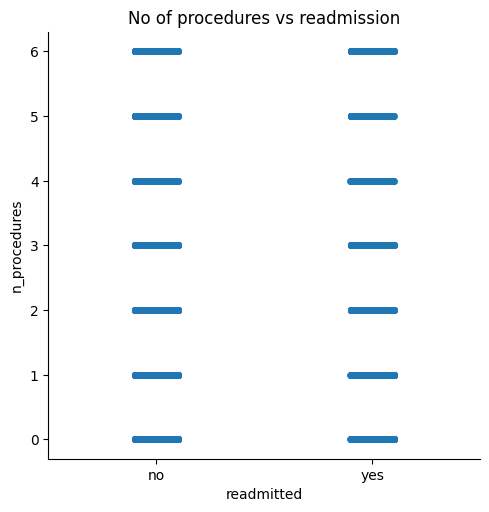

In [16]:
#Some patients undergo more procedures than the others. Does this increase thwir risk of readmission?
sb.catplot(y='n_procedures', x='readmitted', data=df).set(title="No of procedures vs readmission")

**Finding:** No, the number of procedures have no bearing on readmission

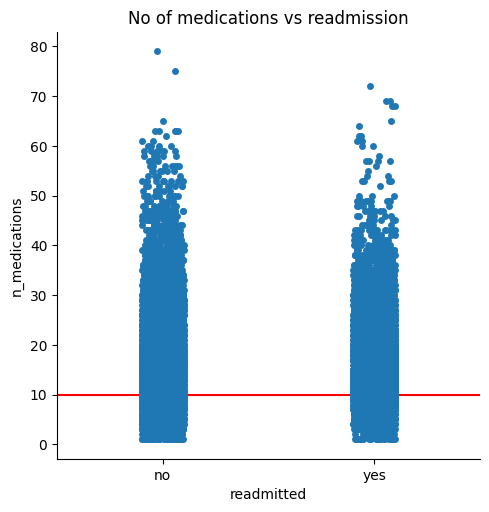

In [17]:
#Some believe that patients on many medications greater than 10 are at an increased rick of readmission. So, let's check if our data supports that or not.
sb.catplot(y='n_medications', x='readmitted', data=df).set(title="No of medications vs readmission")
plt.axhline(y=10, color='r', linestyle='solid')

**Finding:** This shows that majority of patients taking many medications(>10) were not readmitted therefore, the number of medications doesn't affect readmission.
While being on multiple medications may point to multiple co-mornidities in the patient, other factors like compliance with those drigs, dosage adjusent, interactions of the drugs, etc  may determine the risk of readmission better and this creates for a gap in knowledge that can be further explored with more researches.

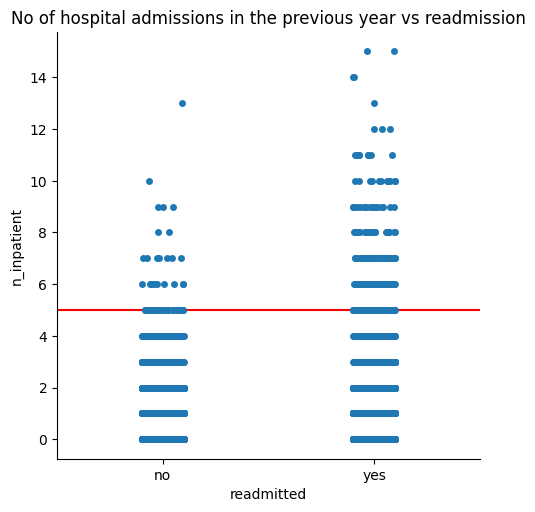

In [18]:
#How does the number of hospital treatments on admissions(as inpatient) in the last one year affect readmission. Do people who get frequently admitted have higher risk of readmission?
sb.catplot(y='n_inpatient', x='readmitted', data=df).set(title="No of hospital admissions in the previous year vs readmission")
plt.axhline(y=5, color ='r', linestyle ='solid')

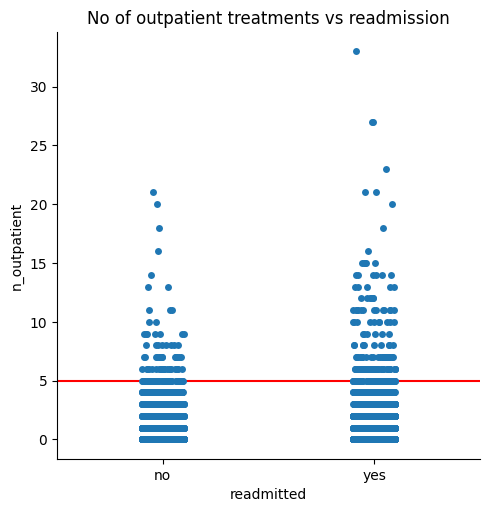

In [19]:
#How about those treated without hospital admission? Does the frequency of their visits to the hospital also play a role in readmission?
sb.catplot(y='n_outpatient', x='readmitted', data=df).set(title ="No of outpatient treatments vs readmission")
plt.axhline(y=5, color='r', linestyle='solid')

**Inferences:**
- The risk of readmission was initially equal but after 5 hospital treatments in the previous year, whether as inpatient or outpatient, the risk of readmission gradually increased.
- Frquent hospital visits/admissions may be a pointer to an underlying problem, be it medical, surgical or psychosocial and if not taken care of, the patients will keep coming back to the hospital. Such patients should have in-depth re-evaluation of their condition from the diagnosis to the medications they are on, investigations, etc to be able to better understand the patient's condition and any other unerlying problem for a more satisfactory and complete care.
- They would also benefit from close monitoring, adequate counsepling on home-care and regular automated follow-up calls.


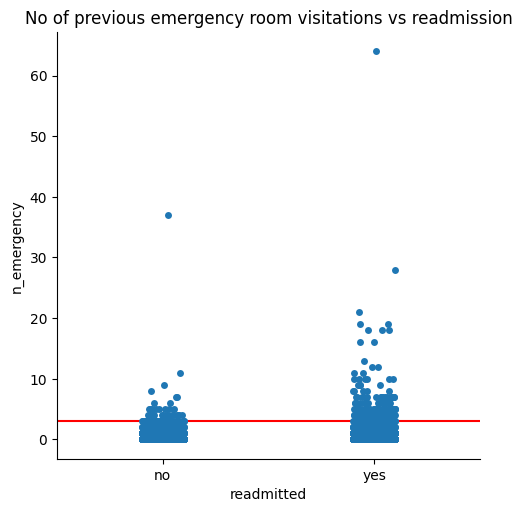

In [20]:
#What if the visitations were as emergency cases, do they play a role in readmission?
sb.catplot(y='n_emergency', x='readmitted', data=df).set(title="No of previous emergency room visitations vs readmission")
plt.axhline(y=3, color='r', linestyle='solid')

**Inference:**
- This shows that having more than 3 visits to the emergency room in the previous year increases the risk of readmission.

# _**Summary**_
Based on the analysis of the provided data;
- The commonest primary diagnosis across all age groups is circulatory i.e diseases of the heart and blood vessels except those between the ages of 40-50years whose primary diagnosis fall under 'others'
- Diagnosis of diabetes doesn't play a central role in the rates of readmission
- The only variables that affect rate of readmission are the number of previous inpatient or outpatient treatment in the preceding year and the number of visits to the emergency room in the last one year. There is a positive correlation between them and can therefore be used as indicators for readmission.

# _**Conclusion**_
- In conclusion, for every admitted patient, there is about a 50% risk of readmission however, this risk increases if they have had more than 5 hospital treatments or more than 3 visits to the emergency room in the last 1 year.

# _**Recommendations**_
- Predicated on this conclusion, the hospital management should carry out further researches to confirm this relationship and explore other variables that may directly or indirectly play important roles on readmission such as compliance with treatment and follow-ups, home care, co-mornidities, etc.
- The hospital management can also employ technological approaches which uses Artificial intelligence to quickly identify the highlighed indicators and quickly set up series of automated follow-up calls and alerts to the managing team so that they can become more proactive.
- All patients should be appropriately and adequately managed and followed-up on to reduce their overall chances of readmission 

![images (94)](images%20(94).jpeg)
